In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,6]

In [97]:
online = pd.read_csv('~/downloads/Online Marketing data.csv')
online.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,3
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,5


In [102]:
online.shape

(1000, 11)

In [103]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      984 non-null    object
 4   Location     1000 non-null   object
 5   Salary       939 non-null    object
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
 10  Cust_Id      1000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [104]:
online.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married         16
Location         0
Salary          61
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [105]:
online['Married'].unique()

array(['Single', 'Married', nan], dtype=object)

In [106]:
online['Salary'].unique()

array(['47500', '63600', '13500', '85600', '68400', '30400', '48100',
       '51900', nan, '111800', '44100', '111400', '110000', '83100',
       '82800', '90100', '38600', '14000', '14300', '49800', '60200',
       '43500', '41700', '92300', '62800', '72900', '66900', '21700',
       '39700', '72200', '87700', '104100', '67700', '27000', '64100',
       '47000', '41600', '20100', '64000', '96800', '76200', '81500',
       '49600', '111500', '126500', '83300', '90500', '87200', '105300',
       '56000', '46600', '69800', '60300', '67800', '42300', '33700',
       '62700', '25900', '15600', '14600', '62600', '66700', '72500',
       '13200', '51300', '72300', '90400', '71500', '14400', '15000',
       '57600', '60600', '84300', '24400', '22100', '48800', '74700',
       '127000', '47200', '48700', '20400', '39000', '12900', '67300',
       '134500', '75500', '33600', '16300', '27400', '110400', '21100',
       '81200', '87100', '42200', '59000', '52700', '20900', '90700',
       '91800'

In [107]:
online['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [108]:
online[(online['Salary'].isnull())|(online['Salary']=='NAAN') | (online['Salary']=='nan')]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
9,Old,Male,Own,Married,Far,NaN,0,NaN,18,3034,10
10,Young,Male,Rent,Married,Close,NaN,1,NaN,12,927,11
46,Middle,Male,Own,Married,Close,NaN,0,NaN,6,983,47
47,Young,Male,Own,Married,Close,NaN,0,NaN,18,1215,48
82,Young,Female,Rent,Single,Far,NaN,1,Medium,24,920,83
...,...,...,...,...,...,...,...,...,...,...,...
849,Young,Male,Rent,Single,Far,NaN,0,NaN,24,571,850
874,Middle,Male,Own,Married,Close,NaN,1,Medium,6,757,875
938,Middle,Male,Rent,Single,Far,NaN,1,NaN,18,1773,939
966,Old,Male,Rent,Married,Close,NaN,0,High,12,1389,967


In [109]:
online['Salary'].replace(to_replace='NAAN',value=np.nan,inplace=True)

In [112]:
online['Salary'].replace(to_replace='NAN',value=np.nan,inplace=True)

In [113]:
online['Salary'].fillna(value=online['Salary'].median(),inplace=True)

In [114]:
online['Salary'].unique()

array(['47500', '63600', '13500', '85600', '68400', '30400', '48100',
       '51900', 53700.0, '111800', '44100', '111400', '110000', '83100',
       '82800', '90100', '38600', '14000', '14300', '49800', '60200',
       '43500', '41700', '92300', '62800', '72900', '66900', '21700',
       '39700', '72200', '87700', '104100', '67700', '27000', '64100',
       '47000', '41600', '20100', '64000', '96800', '76200', '81500',
       '49600', '111500', '126500', '83300', '90500', '87200', '105300',
       '56000', '46600', '69800', '60300', '67800', '42300', '33700',
       '62700', '25900', '15600', '14600', '62600', '66700', '72500',
       '13200', '51300', '72300', '90400', '71500', '14400', '15000',
       '57600', '60600', '84300', '24400', '22100', '48800', '74700',
       '127000', '47200', '48700', '20400', '39000', '12900', '67300',
       '134500', '75500', '33600', '16300', '27400', '110400', '21100',
       '81200', '87100', '42200', '59000', '52700', '20900', '90700',
       '91

In [115]:
online['Salary']=online['Salary'].astype('int')

In [116]:
online['Salary']=online['Salary'].astype('int')

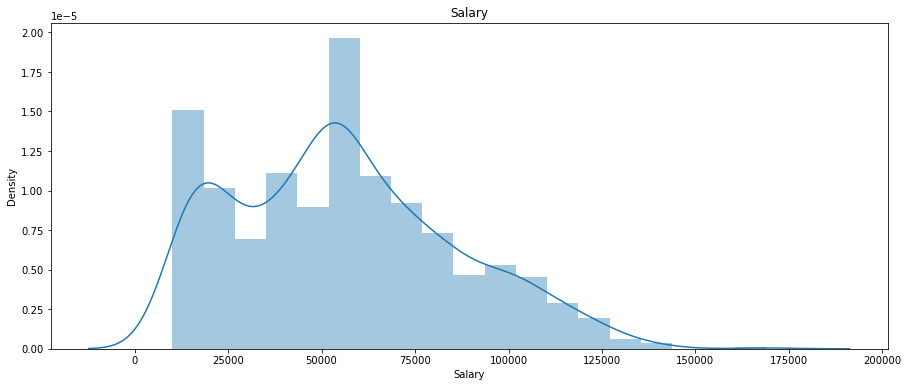

In [117]:
sns.distplot(online['Salary'])
plt.title('Salary')
plt.show()

From the plot we can assume that the curve is positively skewed.

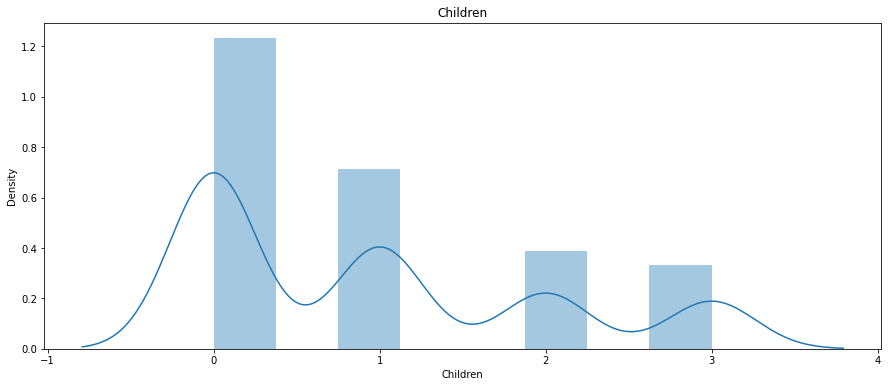

In [118]:
sns.distplot(online['Children'])
plt.title('Children')
plt.show()

We can assume that people with no children are more compared to others

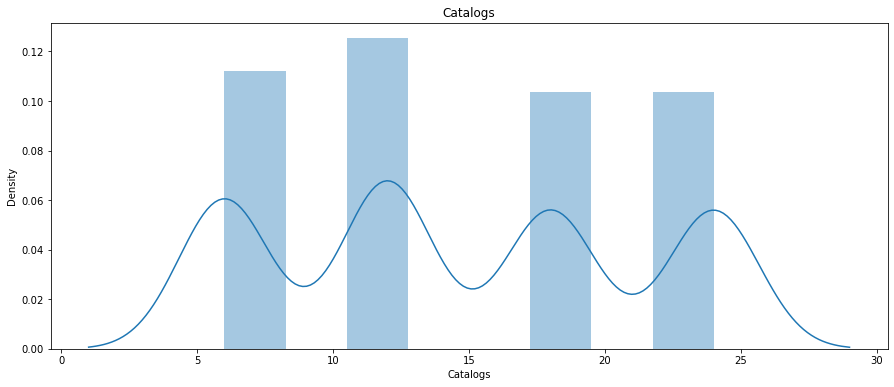

In [119]:
sns.distplot(online['Catalogs'])
plt.title('Catalogs')
plt.show()

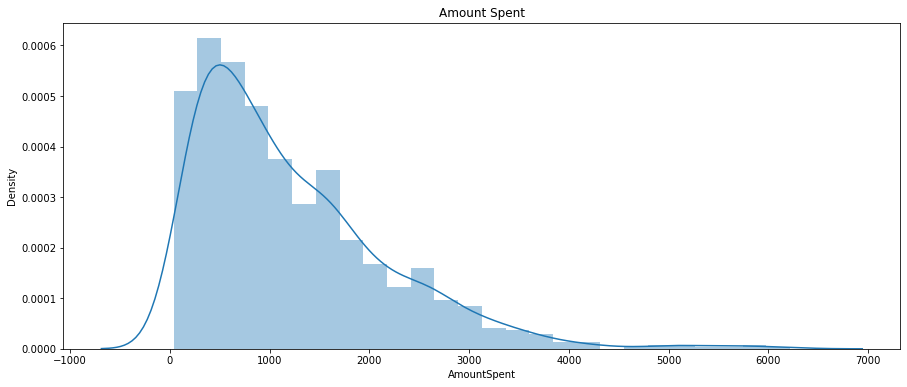

In [120]:
sns.distplot(online['AmountSpent'])
plt.title('Amount Spent')
plt.show()

From the plot we can assume that the plot is positively skewed.

In [ ]:
# univariate Categorical

In [121]:
online.select_dtypes(include='object').columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History'], dtype='object')

In [122]:
cols = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']

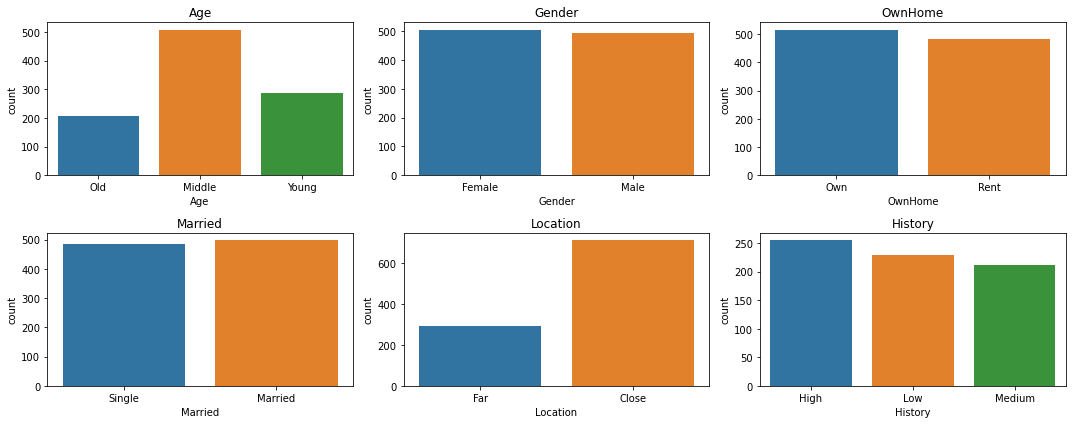

In [28]:
rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(online.loc[:,i])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

**Inference**
* Middle age customers are more.
* Female customers are more as compared to the males.
* More no. of customers own their house.
* Married customers are more.
* Most of the customers stay close to the stores.
* Around 250 people have high purchase history.

In [ ]:
# Bivariate analysis

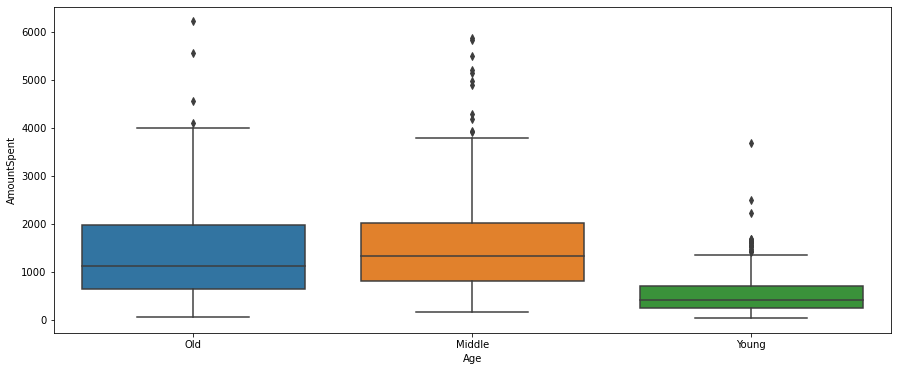

In [123]:
sns.boxplot(x=online['Age'],y=online['AmountSpent'])
plt.show()

Middle age people are spending more than any other

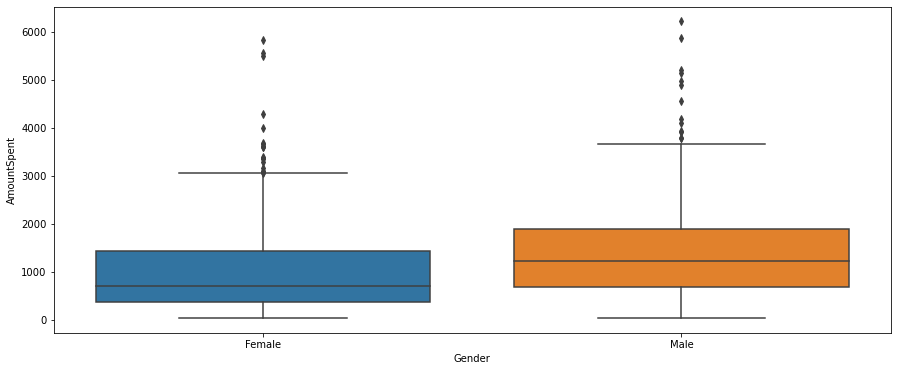

In [124]:
sns.boxplot(x=online['Gender'],y=online['AmountSpent'])
plt.show()

Males are spending more than the females.

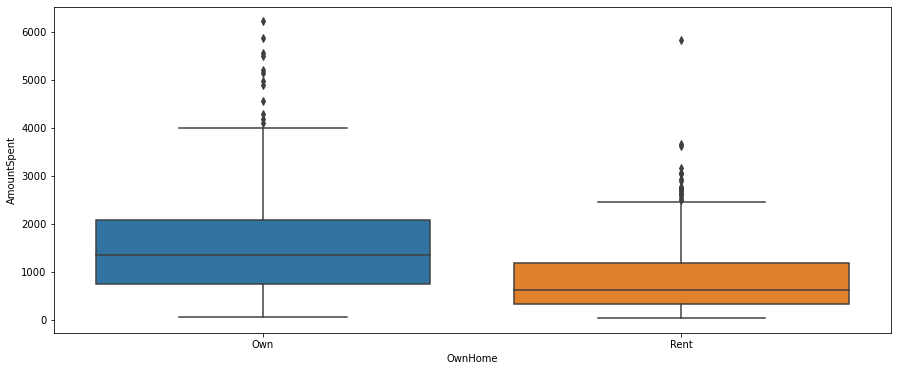

In [125]:
sns.boxplot(x=online['OwnHome'],y=online['AmountSpent'])
plt.show()

People living on rent are spending less compared to people who are own their house.

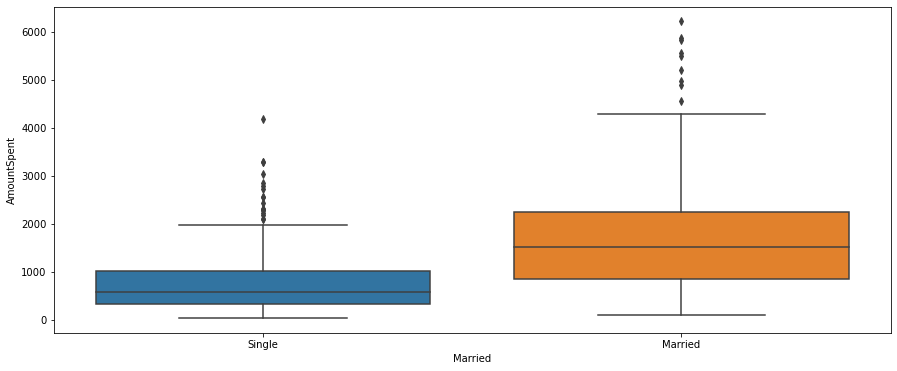

In [126]:
sns.boxplot(x=online['Married'],y=online['AmountSpent'])
plt.show()

Married people have more expenses compared to the single people.

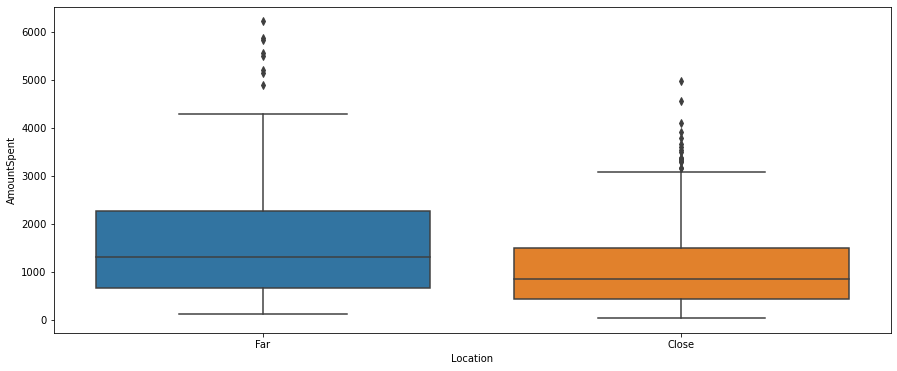

In [127]:
sns.boxplot(x=online['Location'],y=online['AmountSpent'])
plt.show()

People living far to store are spending more money as compared to close ones.

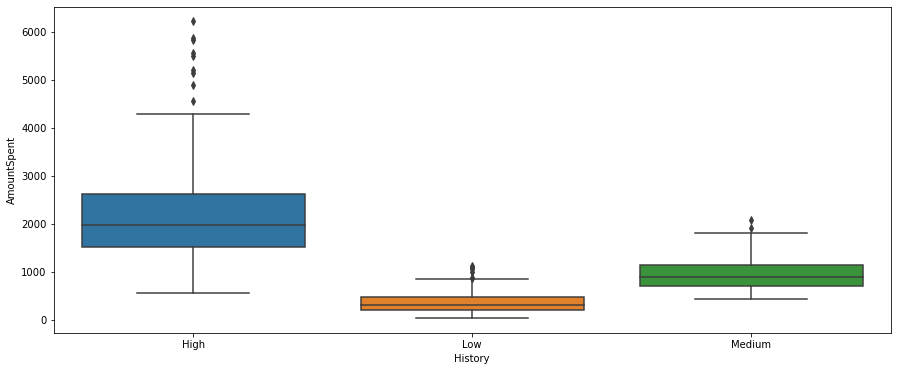

In [128]:
sns.boxplot(x=online['History'],y=online['AmountSpent'])
plt.show()

Its obvious that people with high purchase history have spend much in the stores. Even plot justify the assumption.

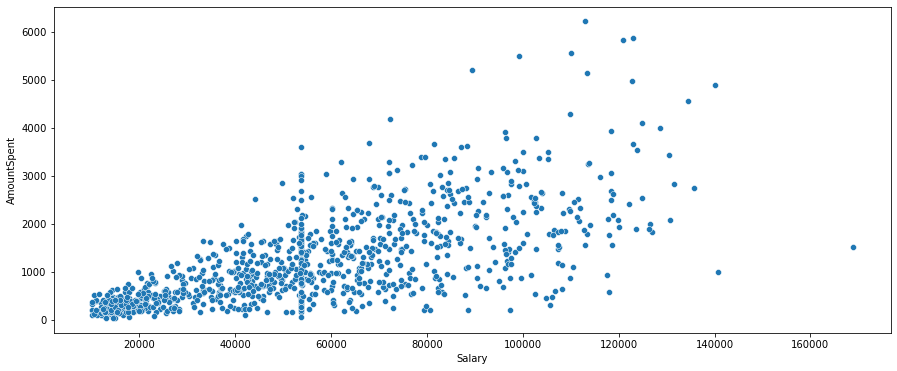

In [129]:
sns.scatterplot(x=online['Salary'], y=online['AmountSpent'])
plt.show()

* From the graph it is clear that people with more salary are spending more.
* People with salary around 50000 are spending more.

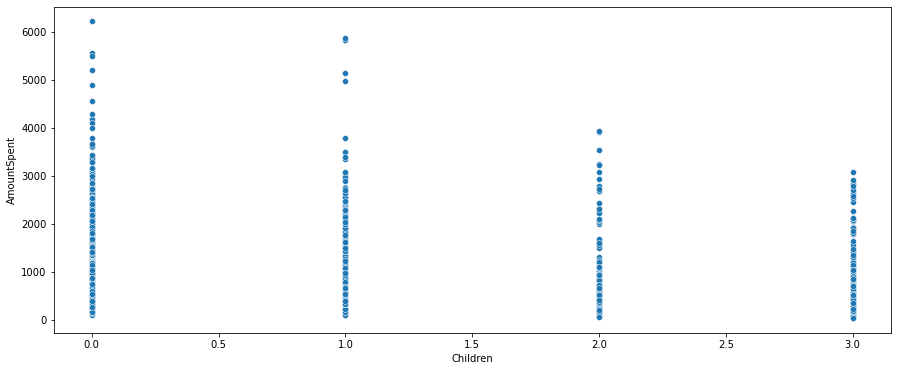

In [130]:
sns.scatterplot(x=online['Children'], y=online['AmountSpent'])
plt.show()

Customers with no child are spending more compared to the customers with children.

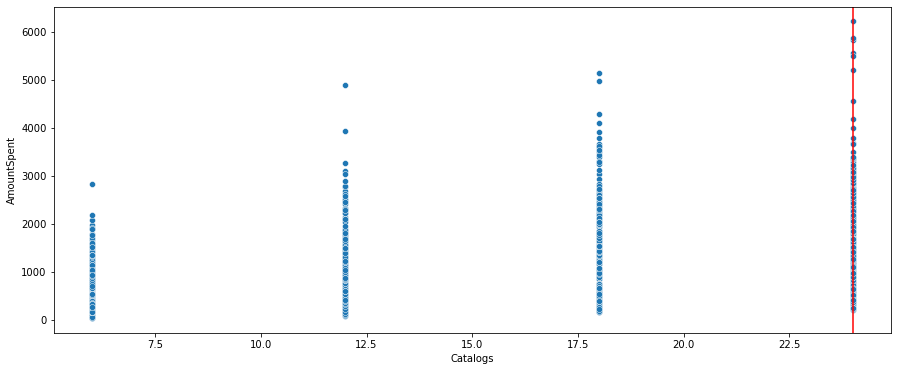

In [131]:
sns.scatterplot(x=online['Catalogs'], y=online['AmountSpent'])
plt.axvline(24,color='red')
plt.show()

People with Catalouge list if 24 have spend the most.

In [132]:
online.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,2
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,3
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,4
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,5


5.	Fix the ‘variable of interest’ and try to establish the relation (or the lack of it) it has with each of the other variables.

Amount Spent is the Target variable. 

In [133]:
# Missing values in Married column:

online['Married'].fillna(value=online['Married'].mode()[0],inplace=True)

In [134]:
# Missing values in History:

online['History'].fillna(value=online['History'].mode()[0],inplace=True)

In [135]:
online.select_dtypes(include='object').columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History'], dtype='object')

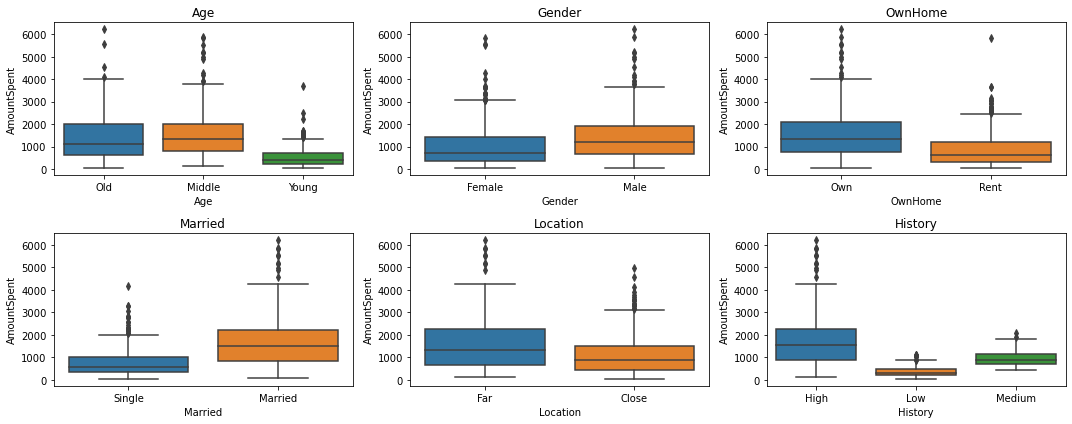

In [136]:
cols = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']

rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(x=online.loc[:,i],y=online['AmountSpent'])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

In [137]:
online.select_dtypes(include=np.number).columns

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent', 'Cust_Id'], dtype='object')

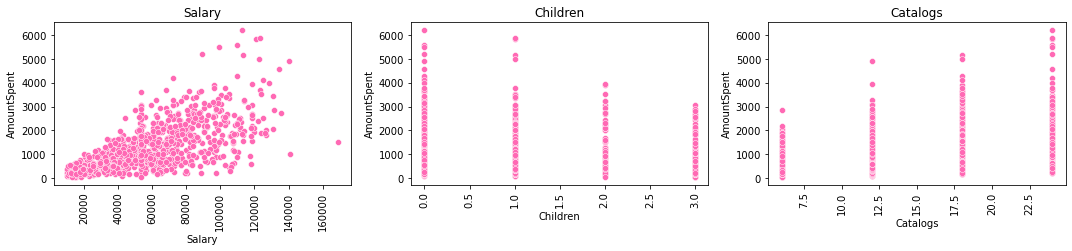

In [138]:
cols = ['Salary', 'Children', 'Catalogs']

rows = 2
columns = 3
iterator = 1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.scatterplot(x=online.loc[:,i],y=online['AmountSpent'],color='hotpink')
    plt.title(i)
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

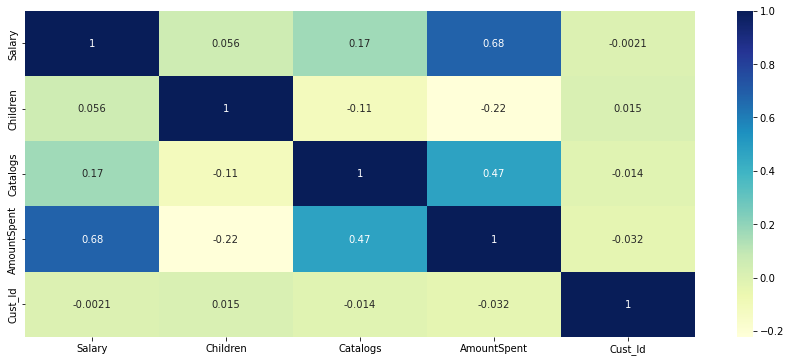

In [149]:
sns.heatmap(online.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Removal of outliers:

As it is a finance dataset there is no need to remove outliers.

In [139]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [143]:
new_df = online.drop(columns='Cust_Id')

In [144]:
new_df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [145]:
new_df.select_dtypes(include=np.number).columns

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent'], dtype='object')

In [150]:
cols = ['Salary', 'Children', 'Catalogs', 'AmountSpent']

In [154]:
for i in cols:
    new_df.loc[:,i]=sc.fit_transform(pd.DataFrame(new_df.loc[:,i]))

In [155]:
new_df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,-0.284798,-0.889063,High,-1.311563,-0.480716
1,Middle,Male,Rent,Single,Close,0.257040,-0.889063,High,-1.311563,0.105383
2,Young,Female,Rent,Single,Close,-1.429054,-0.889063,Low,0.501240,-0.958548
3,Middle,Male,Own,Married,Close,0.997441,0.062825,High,0.501240,1.269254
4,Middle,Female,Own,Single,Close,0.418582,-0.889063,High,-0.405161,0.090809


In [166]:
df = pd.get_dummies(new_df,drop_first=True)
df

,Salary,Children,Catalogs,AmountSpent,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium
0,-0.284798,-0.889063,-1.311563,-0.480716,1,0,0,0,1,1,0,0
1,0.257040,-0.889063,-1.311563,0.105383,0,0,1,1,1,0,0,0
2,-1.429054,-0.889063,0.501240,-0.958548,0,1,0,1,1,0,1,0
3,0.997441,0.062825,0.501240,1.269254,0,0,1,0,0,0,0,0
4,0.418582,-0.889063,-0.405161,0.090809,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.230492,0.062825,0.501240,-0.866938,0,1,0,1,1,0,0,0
996,-0.520381,0.062825,0.501240,-0.149669,0,0,1,1,1,1,0,0
997,-0.076140,-0.889063,1.407642,0.208445,1,0,1,0,1,0,0,1
998,0.775321,1.014712,0.501240,-0.568162,0,0,1,0,0,0,0,1


In [170]:
from sklearn.model_selection import train_test_split

X = df.drop(['AmountSpent'],axis=1)
y = df['AmountSpent']

In [171]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=2)

In [174]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(700, 11)
(700,)
(300, 11)
(300,)
